In [82]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statistics import mean

from scipy.optimize import curve_fit

# Set Helvetica as the default font
mpl.rcParams['font.family'] = 'Helvetica'

In [83]:

def plot_data(data, title, params, max_x=500):

    # set x-axis ligand concentrations
    names = data["Name"]
    l = [i[:-2] for i in list(names)]
    x_conc = [float(i) for i in list(dict.fromkeys(l))]

    # values to plot
    yD = data["RFU/OD_DHIQ"]
    yR = data["RFU/OD_R-THIQ"]
    yS = data["RFU/OD_S-THIQ"]

    #process data via a dictionary
    data_dict = {}
    for i in range(0,len(names)):
        l = names[i][:-2]
        if l not in data_dict:
            data_dict[l] = {"S": [yS[i]], "R": [yR[i]], "D": [yD[i]]}
        else:
            data_dict[l]["S"].append(yS[i])
            data_dict[l]["R"].append(yR[i])
            data_dict[l]["D"].append(yD[i])
    #calculate averages
    for i in data_dict.keys():
        data_dict[i]["avgS"] = mean(data_dict[i]["S"])
        data_dict[i]["avgR"] = mean(data_dict[i]["R"])
        data_dict[i]["avgD"] = mean(data_dict[i]["D"])
            
        #create plots
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines['left'].set_linewidth(2.5)

        #Hill sigmoid function
    def sigmoid(x, a, b, c, d):
            return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))

    # create xaxis for curvefit
    xaxis_max = max_x
    x = np.linspace(1e-8,xaxis_max,100000)

    # define initial parameters. THIS IS ALWAYS TRIAL AND ERROR!
        # median_x = np.median(x)
        # half_y = float(max(y))/2
    initParam = (200, 10, 10, 0.1)
    initParam = (params[0], params[1], params[2], params[3])


    # prepare S data
    S = []
    for i in data_dict:
        S.append(float(data_dict[i]["avgS"]))
    Spoints = []
    for i in data_dict:
        Spoints.append(data_dict[i]["S"])
    # plot S line
    popt, pcov = curve_fit(sigmoid, x_conc, S, initParam, maxfev=10000)
    plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color="#00a824")
    # plot dots
    for i in range(0, len(Spoints)):
        for k in Spoints[i]:
            plt.scatter(x_conc[i], k, s=40, color="#00a824")

    # prepare R data
    R = []
    for i in data_dict:
        R.append(float(data_dict[i]["avgR"]))
    Rpoints = []
    for i in data_dict:
        Rpoints.append(data_dict[i]["R"])
    # plot R line
    popt, pcov = curve_fit(sigmoid, x_conc, R, initParam, maxfev=10000)
    plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color="#e87000")
    # plot dots
    for i in range(0, len(Rpoints)):
        for k in Rpoints[i]:
            plt.scatter(x_conc[i], k, s=40, color="#e87000")


    # prepare D data
    D = []
    for i in data_dict:
        D.append(float(data_dict[i]["avgD"]))
    Dpoints = []
    for i in data_dict:
        Dpoints.append(data_dict[i]["D"])
    # plot R line
    popt, pcov = curve_fit(sigmoid, x_conc, D, initParam, maxfev=10000)
    plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color="#0065d1")
    # plot dots
    for i in range(0, len(Dpoints)):
        for k in Dpoints[i]:
            plt.scatter(x_conc[i], k, s=40, color="#0065d1")


    # set plot style
    plt.title(title, fontsize=22, pad=15)
    plt.xlabel("Ligand (uM)", fontsize=22, labelpad=15)
    plt.ylabel("Fluorescence (RFU/OD)", fontsize=22, labelpad=15)
    plt.yticks(size=22)
    plt.xticks(size=22)
    ax.set_xscale("log")
    ax.set_xlim(1,1000)
    # Setting y-axis to scientific notation
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.savefig("../SVG/"+str(title)+".svg", format="svg")
    plt.show()
    print("saved figure to "+ title + ".svg")

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


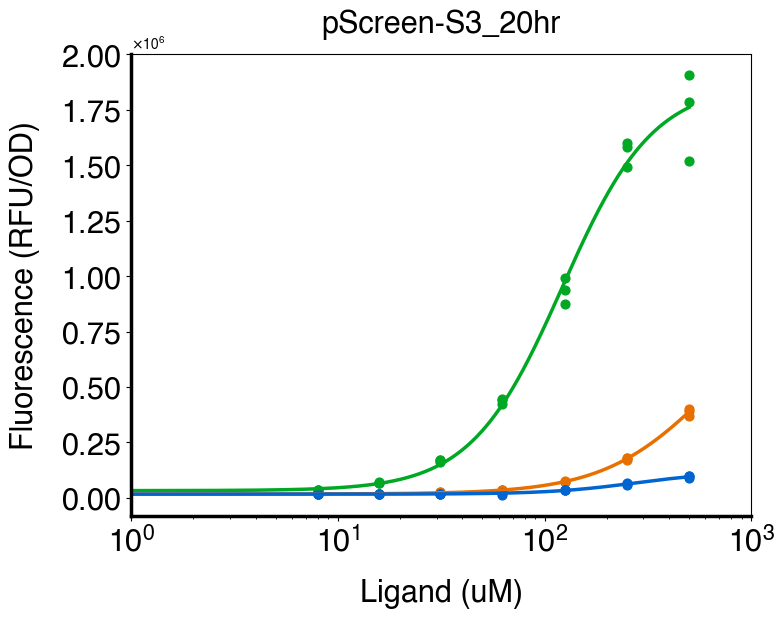

saved figure to pScreen-S3_20hr.svg


In [84]:
name = "pScreen-S3_20hr"
with open("../Data/pScreen_selectivity.xlsx", 'rb') as f:
    data = pd.read_excel(f, sheet_name=name)

plot_data(data, title=name, params=[200,10,10,0.1])

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


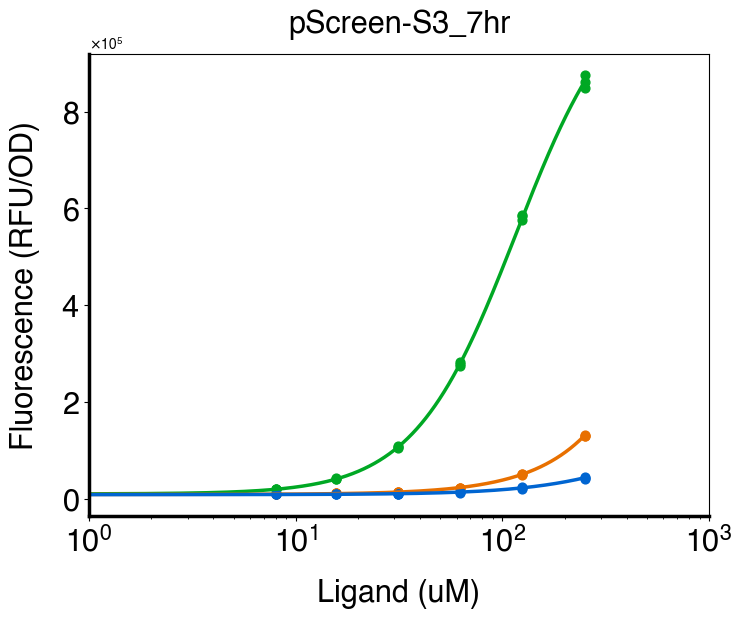

saved figure to pScreen-S3_7hr.svg


In [85]:
name = "pScreen-S3_7hr"
with open("../Data/pScreen_selectivity.xlsx", 'rb') as f:
    data = pd.read_excel(f, sheet_name=name)

plot_data(data, title=name, params=[200,10,10,0.1], max_x=250)

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


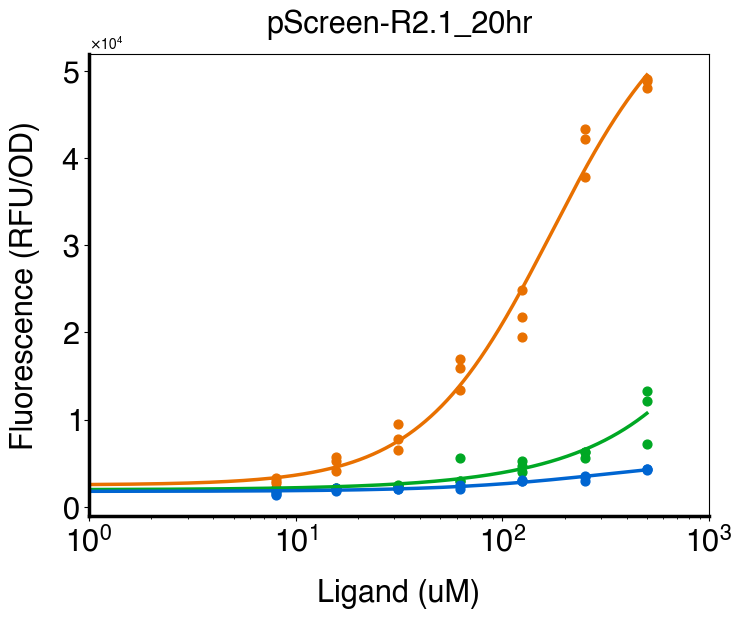

saved figure to pScreen-R2.1_20hr.svg


In [86]:
name = "pScreen-R2.1_20hr"
with open("../Data/pScreen_selectivity.xlsx", 'rb') as f:
    data = pd.read_excel(f, sheet_name=name)

plot_data(data, title=name, params=[200,10,10,0.1])

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_21393/1280959827.py:36: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


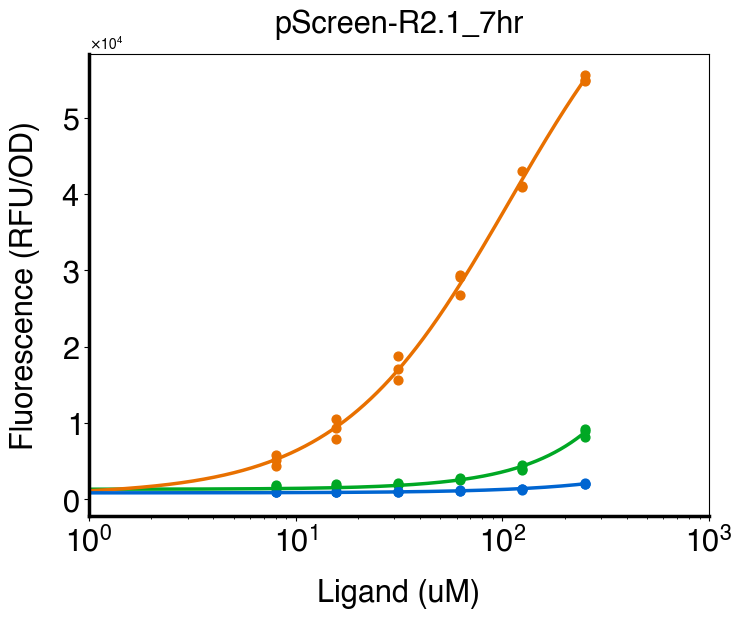

saved figure to pScreen-R2.1_7hr.svg


In [87]:
name = "pScreen-R2.1_7hr"
with open("../Data/pScreen_selectivity.xlsx", 'rb') as f:
    data = pd.read_excel(f, sheet_name=name)

plot_data(data, title=name, params=[200,10,10,0.1], max_x=250)